# Taller de Python: versión numérico y laboratorios!

![](./logo_fifa.png)

Vamos a usar este notebook para aprender a manejar [NumPy](http://www.numpy.org/) (cálculo numérico en general) y [matplotlib](http://matplotlib.org/) (gráficos para todos y todas). Ambas bibliotecas son parte de [SciPy](http://scipy.org/), el ecosistema científico por default de Python. 

---

**Disclaimer**: la idea de este notebook es que ustedes puedan ir ejecutando cada celda a medida que vamos explicando. De esa forma, ustedes pueden ver en tiempo real que hace su código. En vista de eso, les recordamos que con Ctrl+Enter pueden ejecutar una celda y con Shift+Enter ejecutan y pasan inmediatamente a la celda de abajo. 

Además, como a programar se aprende programando, cada tanto van a ver alguna función o forma de escribir algo que en el taller introductorio no explicamos. En este taller, tampoco vamos a explicar esos "extras". El objetivo de semejante acto de maldad es forzarlos a que busquen la documentación pertinente en internet y la lean. Habiendo dicho eso, les recordamos que en los notebooks de Jupyter y de IPython pueden visualizar los _docstrings_ de una función presionando Shift+Tab. 

---

## Temario
1. NumPy:
    + ndarray: una lista, un vector, una matriz...Da lo mismo.
    + Un poco de álgebra lineal.
    + Indexar ndarrays
2. matplotlib:
    + La función plot.
    + Gráficos re chetos.
3. Laboratorio:
    + Adquisición con python y osciloscopio (pyvisa).
    + Análisis de datos.
4. Yapas:
    + Integración numérica de ecuaciones diferenciales.
    + matplotlib: subplots, ejes y figuras.
    + Estadística básica

## 1. NumPy
NumPy es LA biblioteca para cálculo vectorial. Además de contener un nuevo tipo de datos que nos va a ser muy útil para representar vectores y matrices, nos provee de un arsenal de [funciones de todo tipo](https://docs.scipy.org/doc/numpy/reference/routines.html).

Para aprender a programar, hay que programar.

In [1]:
#siempre importamos la biblioteca primero
import numpy as np
import math #para comparar algunas cosas

In [2]:
#funciones básicas (también en biblioteca math)
a, b, c = 10., 20., 3.14
print('Tenemos a pi:', np.pi, '\nY también su coseno:', np.cos(np.pi))
print('Opa! Que pasó con el \\n?')
print('Y el np.pi de numpy es el mismo que el de math?')

resultado = np.pi == math.pi
print('Claro que si campeón!', '\t\t(El resultado de eso es', resultado, ').')

#y otras
print(np.exp(a), '+', np.exp(b), '=', np.exp(a)+np.exp(b))

#y el seno de pi?
print(np.sin(np.pi))
#cualquier cosa por 10**-16 es cero para mi
print('{:.0f}'.format(np.sin(np.pi)))
#opa! también puedo arreglar el pequeño error de formato de antes
print('Claro que si campeón!', '\t\t(El resultado de eso es', '{}'.format(resultado)+').')

Tenemos a pi: 3.141592653589793 
Y también su coseno: -1.0
Opa! Que pasó con el \n?
Y el np.pi de numpy es el mismo que el de math?
Claro que si campeón! 		(El resultado de eso es True ).
22026.4657948 + 485165195.41 = 485187221.876
1.22464679915e-16
0
Claro que si campeón! 		(El resultado de eso es True).


### ndarray: una lista, un vector, una matriz...Da lo mismo
El tipo de datos que maneja NumPy es el ndarray, array para los amigos. Mal y pronto, es una lista poderosa. Del [Quickstart tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html) de NumPy (traducido por sus propios físicos):
>El objeto principal de NumPy es el array multidimensional homogéneo. Es una tabla de datos (usualmente números) todos del mismo tipo, indexados por una tupla de enteros positivos. En NumPy las dimensiones se llaman _ejes (axes)_. El número de ejes es el _rango (rank)_.

>Por ejemplo, las coordenadas de un punto en el espacio 3D [1, 2, 1] es un _array_ de _rango_ 1, porque tiene un sólo _eje_. Ese _eje_ tiene longitud 3. En el ejemplo de abajo, el _array_ es de rango 2 (es bidimensional). La primer dimensión (eje) tiene longitud 2, la segunda dimensión tiene longitud 3.

>[[1, 2, 3],
>[4, 5, 6]]

Entonces, vamos por partes:
* Qué diablos es un array? Es un contenedor de datos. En ese sentido, el array va a ser parecido a una lista de Python. La primer diferencia que encontramos respecto a las listas es la forma que toman las operaciones matemáticas. Veámoslo en un ejemplo:

In [3]:
#creemos algunos arrays y operemos con ellos
#el método 'array' toma como primer argumento un 'array_like'
#un 'array_like' es una lista u otro array... o sea, un array_like
a = np.array([1, 2, 3])
b = np.array([4,5,6])
print('Las operaciones con arrays son elemento a elemento.\na + b = ', a + b)
print('Algunas otras:\na * b = ', a * b, '\ta^b =', a**b, '\ta^2 = ', a**2)

Las operaciones con arrays son elemento a elemento.
a + b =  [5 7 9]
Algunas otras:
a * b =  [ 4 10 18] 	a^b = [  1  32 729] 	a^2 =  [1 4 9]


* Otra diferencia con las listas es que los arrays tienen todos elementos de un mismo tipo. En numpy, el tipo de datos que contiene el array viene dado por su [dtype](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html#arrays-dtypes), el cuál nos dice el tipo de datos propiamente dicho (int, float, complex, string, otros) y cuánto espacio, en bits, ocupan en memoria (32, 64, 25, etc.).
Preguntémosle a un par de arrays cuál es su dtype:

In [4]:
af = np.array([1., 2., 3.]) #array de floats
am = np.array([1.2, 3, 7]) #array mixto (ints y floats)

#el método 'dtype' de numpy nos dice qué tipo de elementos tiene el array
print('af.dtype =', af.dtype, '\t\t(float64 es el dtype default de numpy)')
print('Alguno de los arrays de antes, a.dtype = ', a.dtype)
print('ay b son del mismo tipo, no?', a.dtype == b.dtype)

#veamos qué pasa con el mixto
print('am.dtype =', am.dtype)
#los convirtió todos a floats!
print('am =', am)

#por último, si quiero un dtype específico
af32 = np.array([1, 2, 3], dtype=np.float32)
print('El último array tiene dtype' ,af32.dtype)

af.dtype = float64 		(float64 es el dtype default de numpy)
Alguno de los arrays de antes, a.dtype =  int64
ay b son del mismo tipo, no? True
am.dtype = float64
am = [ 1.2  3.   7. ]
El último array tiene dtype float32


* Para terminar de entender al ndarray, veamos el temita de la multidimensionalidad. De paso, vamos a ver cómo podemos llamar a elementos específicos dentro de un array.

    Arranquemos conel 1D. Recordemos que a las "dimensiones" de un array se las llama ejes.


In [5]:
a1d = np.array([1, 2, 3]) #este tiene un eje
#igual que las listas, los arrays están indexados
suma = a1d[0] + a1d[1] + a1d[2] #con un índice me basta para recuperar elementos individuales
print('Suma de elementos de a1d:', suma)

Suma de elementos de a1d: 6


Ahora agrueguemos dimensiones. Pero vamos de a poco.

In [6]:
#ahora agreguemos un eje/dimensión más
a2d = np.array([
                [1, 2, 3], 
                [4, 5, 6]
                ])
print(a2d)
print()
#ahora necesito 2 indices si quiero un elemento de a2d (la ubicación en cada eje)
#pueden pensarlo como filas y columnas a2d[fila, columna]
print('Primera fila: ', [a2d[0, 0], a2d[0, 1], a2d[0, 2]])
print('Segunda fila: ', [a2d[1, 0], a2d[1, 1], a2d[1, 2]])
print('Más rápido:', [a2d[0], a2d[1]]) #cada fila es un array --> el array 2D es un array de arrays
print('Puedo pedirles cosas como su dtype: a2d[0].dtype =', a2d[0].dtype) #y opera como cualquier array

[[1 2 3]
 [4 5 6]]

Primera fila:  [1, 2, 3]
Segunda fila:  [4, 5, 6]
Más rápido: [array([1, 2, 3]), array([4, 5, 6])]
Puedo pedirles cosas como su dtype: a2d[0].dtype = int64


In [7]:
#pero ojo, que esto no es un array 3D
aN3d = np.array([
                [1, 2, 3], 
                [4, 5, 6],
                [7, 8, 9]
                ])
#sigo necesitando sólo dos índices!
print('Primer elemento de cada fila:', (aN3d[0, 0], aN3d[1, 0], aN3d[2, 0]))

Primer elemento de cada fila: (1, 4, 7)


Así que un array 2D es algo parecido a una matriz (dos índices!). Ahora si, veamos cómo agregar una dimensión más:

In [8]:
a3d = np.array([
                    [
                        [1, 2, 3], 
                        [4, 5, 6]
                    ],
        #dejo un espacio en el medio para que se vea mejor
                    [
                        [7, 8, 9], 
                        [10, 11, 12]
                    ]
                ])
#esto es un array con dos elementos, cada elemento es un array como el a2d
print('El primer elemento es a3d[0]\n', a3d[0])
print('\nEl primer elemento de a3d[0] es ea3d[0,0]:', a3d[0, 0])
print('Ese tiene también su primer elemento: a3d[0, 0, 0] = ', a3d[0, 0, 0])

El primer elemento es a3d[0]
 [[1 2 3]
 [4 5 6]]

El primer elemento de a3d[0] es ea3d[0,0]: [1 2 3]
Ese tiene también su primer elemento: a3d[0, 0, 0] =  1


In [9]:
#para terminar con esto de las dimensiones, veamos las formas de medir al array
#en principio podemos usar len(), el mismo que para listas
print('Longitud del primer array, len(a) = ', len(a))
print('Longitud del 2D:', len(a2d))
print('Longitud del 3D:', len(a3d))

#para más dimensiones no nos da tanta información
#los ndarrays tienen un 'shape'
print('a.shape = ', a.shape)
print('a2d.shape = ', a2d.shape)
print('a3d.shape = ', a3d.shape)

#y también tienen ndim
print('a.ndim = ', a.ndim)
print('a2d.ndim = ', a2d.ndim)
print('a3d.ndim = ', a3d.ndim)

Longitud del primer array, len(a) =  3
Longitud del 2D: 2
Longitud del 3D: 2
a.shape =  (3,)
a2d.shape =  (2, 3)
a3d.shape =  (2, 2, 3)
a.ndim =  1
a2d.ndim =  2
a3d.ndim =  3


Ya deberíamos entender bien qué es un array de numpy. Veamos ahora formas rápidas y convenientes de crear arrays. En general, vamos a crear arrays de tres formas distintas: a mano o a través de tipos convencionales mediante np.array() como hicimos hasta ahora; con métodos propios de numpy; y finalmente tomando datos de un archivo (txt, wav, etc.). Lo que les mostramos acá son algunas y sólo algunas formas del segundo método: a través de funciones específicas para creación de arrays que ya vienen con numpy. Queda en ustedes investigar otras posibilidades en la referencia de numpy.

In [12]:
#equiespaciados
equilin = np.linspace(0, 1, 10)
equilog = np.logspace(1, 2, 10) #y este?
print('Equiespaciado lineal:', equilin)
print('\nEquiespaciado logarítmico:', equilog)

arange = np.arange(0, 1, 1./10) #como el range de python
print('\nComo el range de las listas:', arange)

identidad = np.identity(3)
print('\nIdentidad de 3x3:\n', identidad)
print('Y su shape?', identidad.shape)

#otros para que prueben ustedes
ceros = np.zeros((4, 4)) #todos ceros
unos = np.ones((2,3)) #todos unos
ojos = np.eye(5, k=0) #unos en la diagonal, como identidad
ojos2 = np.eye(5, k=2) #qué pasó acá?

print(ojos)
print()
print(ojos2)

Equiespaciado lineal: [ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]

Equiespaciado logarítmico: [  10.           12.91549665   16.68100537   21.5443469    27.82559402
   35.93813664   46.41588834   59.94842503   77.42636827  100.        ]

Como el range de las listas: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]

Identidad de 3x3:
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
Y su shape? (3, 3)
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]

[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [ ]:
#Ejercicio: crear una matriz de 15 x 15, con los números de 1 al 225.
#Ayuda: La función reshape de un ndarray te permite pasarle una tupla con el tamaño, en este caso (15,15).

### Un poco de álgebra lineal
Vamos a cargar el módulo de algebra lineal de NumPy, _linalg_, y vamos a ver cómo resolver algunas operaciones y problemas típicos.

In [13]:
#tenemos dos formas de acceder a linalg
from numpy import linalg
#y accedemos a las funciones de linalg poniendo el prefijo ln.
#sino, ya importamos numpy como np
norma1 = np.linalg.norm(a) #calcula la norma del array
norma2 = la.norm(a) #misma función, accedida desde la
print('norma1 =', norma1, '\t\tnorma2 =', norma2) #dan lo mismo!

norma1 = 3.74165738677 		norma2 = 3.74165738677


Problema típico 1: Autovalores y autovectores.

In [14]:
matriz = np.array([[1, 2, 5], [2, 5, 8], [4, 0, 8]], dtype=np.float64)
#eig devuelve una tupla de arrays con los autovalores en un array 1D y los autovec en un array 2D
eigens = la.eig(matriz)
print('Los autovalores:', eigens[0], '\nLos autovectores:', eigens[1])

#se terminó el problema

Los autovalores: [ 11.18284163  -0.7098946    3.52705297] 
Los autovectores: [[ 0.3958966   0.87811967 -0.26684193]
 [ 0.77182982  0.25744029 -0.93373034]
 [ 0.49753855 -0.40327453  0.2386274 ]]


Problema típico 2: sistema de ecuaciones lineales.

In [15]:
b = np.array([1, 2, 3])
np.linalg.solve(matriz, b) #resuelve el sistema matriz*X = b

#se terminó el problema

array([ 0.67857143,  0.07142857,  0.03571429])

In [ ]:
#Ejercicio: inventen una matrix de 5 x 5 (con el método que quieran y que no sea la identidad!) y averiguen si es invertible
# No tienen que calcular la inversa. Busquen en a ayuda de numpy.linalg
#Ayuda: ¿qué importancia tenía los autovalores?

### Indexar ndarrays

Además de la gran cantidad de cosas que nos permite calcular numpy, nos da una forma muy útil de tomar elementos de un array mediante su indexado. Veamos un poco de eso:

In [16]:
#dos arrays de muchos elementos
v1 = np.linspace(0, 10, 1000)
v2 = np.linspace(10, 20, 1000)
#si me quiero quedar con los primeros 500 qué hago?
v1[:500]

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

In [17]:
#y con los último 500?
v1[500:]

array([  5.00500501,   5.01501502,   5.02502503,   5.03503504,
         5.04504505,   5.05505506,   5.06506507,   5.07507508,
         5.08508509,   5.0950951 ,   5.10510511,   5.11511512,
         5.12512513,   5.13513514,   5.14514515,   5.15515516,
         5.16516517,   5.17517518,   5.18518519,   5.1951952 ,
         5.20520521,   5.21521522,   5.22522523,   5.23523524,
         5.24524525,   5.25525526,   5.26526527,   5.27527528,
         5.28528529,   5.2952953 ,   5.30530531,   5.31531532,
         5.32532533,   5.33533534,   5.34534535,   5.35535536,
         5.36536537,   5.37537538,   5.38538539,   5.3953954 ,
         5.40540541,   5.41541542,   5.42542543,   5.43543544,
         5.44544545,   5.45545546,   5.46546547,   5.47547548,
         5.48548549,   5.4954955 ,   5.50550551,   5.51551552,
         5.52552553,   5.53553554,   5.54554555,   5.55555556,
         5.56556557,   5.57557558,   5.58558559,   5.5955956 ,
         5.60560561,   5.61561562,   5.62562563,   5.63

In [18]:
#y esas selecciones son arrays, asíque operan como arrays!
v1[:500] + v2[:500]

array([ 10.        ,  10.02002002,  10.04004004,  10.06006006,
        10.08008008,  10.1001001 ,  10.12012012,  10.14014014,
        10.16016016,  10.18018018,  10.2002002 ,  10.22022022,
        10.24024024,  10.26026026,  10.28028028,  10.3003003 ,
        10.32032032,  10.34034034,  10.36036036,  10.38038038,
        10.4004004 ,  10.42042042,  10.44044044,  10.46046046,
        10.48048048,  10.5005005 ,  10.52052052,  10.54054054,
        10.56056056,  10.58058058,  10.6006006 ,  10.62062062,
        10.64064064,  10.66066066,  10.68068068,  10.7007007 ,
        10.72072072,  10.74074074,  10.76076076,  10.78078078,
        10.8008008 ,  10.82082082,  10.84084084,  10.86086086,
        10.88088088,  10.9009009 ,  10.92092092,  10.94094094,
        10.96096096,  10.98098098,  11.001001  ,  11.02102102,
        11.04104104,  11.06106106,  11.08108108,  11.1011011 ,
        11.12112112,  11.14114114,  11.16116116,  11.18118118,
        11.2012012 ,  11.22122122,  11.24124124,  11.26

In [19]:
len(v1[:500] + v2[:500])

500

In [20]:
#en general, podemos dar como índice un array_like cualquiera
v1[[0, 10, 150, 532]]

array([ 0.        ,  0.1001001 ,  1.5015015 ,  5.32532533])

In [123]:
#e incluso podemos poner filtrar datos mediante alguna expresión que de un bool como resultado
v1[v1[:] < 2]

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

## 2. matplotlib

matplotlib es la librería de gráficos 2D por excelencia. Hace gráficos 3D también, pero su fuerte y objetivo general de la vida son los 2D. Vamos a hacer un par de ejemplos para ver lo sencillo que es.

Primero importamos y nos generamos un par de arrays para graficar.

In [21]:
from matplotlib import pyplot as plt #la forma recomendada de importar
#tanto en notebook como consola qt de jupyter esto nos permite graficar 'inline'
%matplotlib inline

In [72]:
x = np.linspace(-5, 5, 2000) #dominio
#un par de funciones para graficar
y1 = x**2
y2 = x**3
y3 = x**2 + x**3

### La función plot

* La primer forma de graficar, la más rápida, es usando la función plot. Vamos a ir viendo la sintaxis junto con los ejemplos, pero en el caso general la forma de conocer la sintaxis es mirando la [documentación](http://matplotlib.org/contents.html) y las [referencias](http://matplotlib.org/api/pyplot_summary.html).

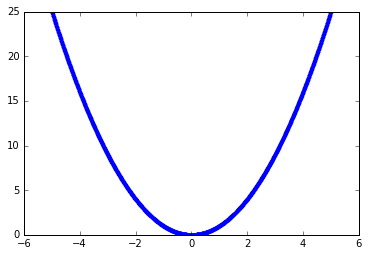

In [23]:
plt.plot(x, y1, 'b.') #'b.' le dice que plotee en azul y con puntitos

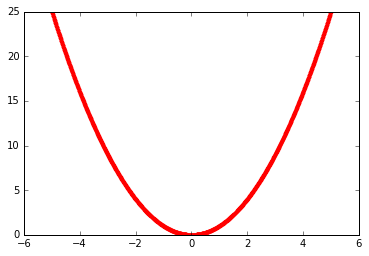

In [24]:
plt.plot(x, y1, 'r.') #podemos usar otro color

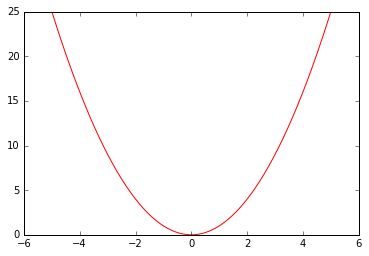

In [25]:
plt.plot(x, y1, 'r-') #es una función, queda mejor si ploteamos con linea y no con puntos

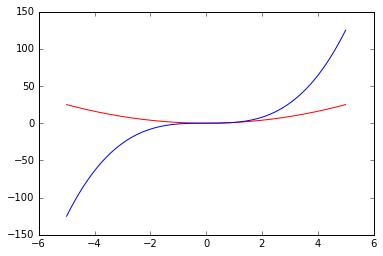

In [26]:
plt.plot(x, y1, 'r-', x, y2, 'b-') #y podemos anexar otra

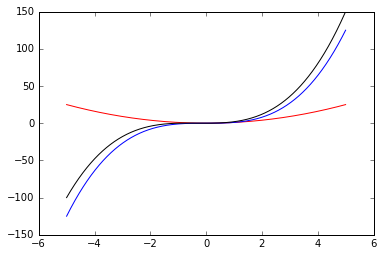

In [27]:
plt.plot(x, y1, 'r-', x, y2, 'b-', x, y3, 'k-') #y otra

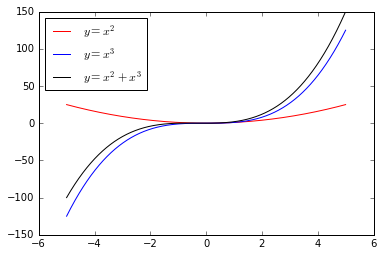

In [28]:
#quiero saber cuál es cuál
label = ['$y = x^2$', '$y = x^3$', '$y = x^2 + x^3$'] #qué? no fuiste al taller de LaTex de la FIFA??
plt.plot(x, y1, 'r-', x, y2, 'b-', x, y3, 'k-')
plt.legend(label, loc='best')

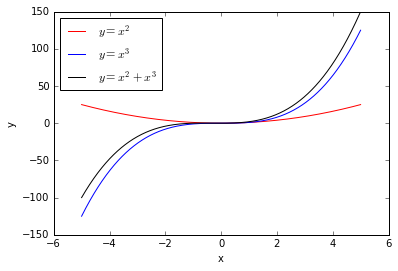

In [29]:
#y que son los ejes?
label = ['$y = x^2$', '$y = x^3$', '$y = x^2 + x^3$']
plt.plot(x, y1, 'r-', x, y2, 'b-', x, y3, 'k-')
plt.legend(label, loc='best')
plt.xlabel('x')
plt.ylabel('y')

### Gráficos re chetos

Ya aprendimos a graficar. Si ahora queremos modificar un poco la apariencia del gráfico, tenemos dos formas: con las [style sheets](http://matplotlib.org/users/style_sheets.html) de matplotlib o configurando parámetros a mano. Modofiquemos algunos parámetros a mano (debemos acceder a los rcParams de pyplot) y después veamos algunos estilos predefinidos.

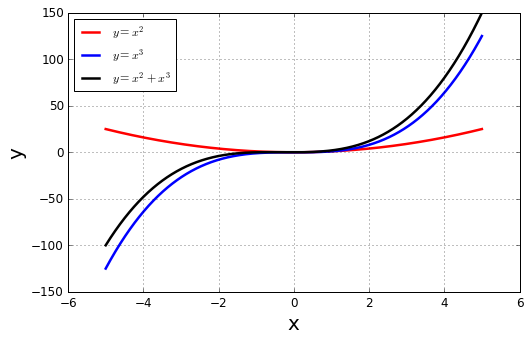

In [30]:
#a mano
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.grid"] = True

plt.plot(x, y1, 'r-', x, y2, 'b-', x, y3, 'k-')
plt.legend(label, loc='best')
plt.xlabel('x')
plt.ylabel('y')

Y algunos de los predefinidos:

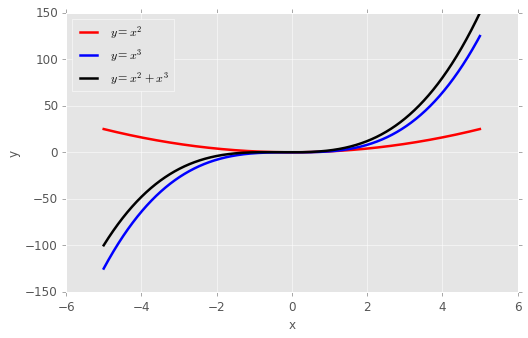

In [31]:
#hay otros estilos de ploteo
plt.style.use('ggplot')
label = ['$y = x^2$', '$y = x^3$', '$y = x^2 + x^3$']
plt.plot(x, y1, 'r-', x, y2, 'b-', x, y3, 'k-')
plt.legend(label, loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [32]:
#si quiero saber qué estilos puedo usar
plt.style.available

['classic',
 'seaborn-muted',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-dark',
 'seaborn-notebook',
 'dark_background',
 'seaborn-ticks',
 'seaborn-talk',
 'seaborn-whitegrid',
 'grayscale',
 'seaborn-white',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn-pastel',
 'ggplot',
 'bmh']

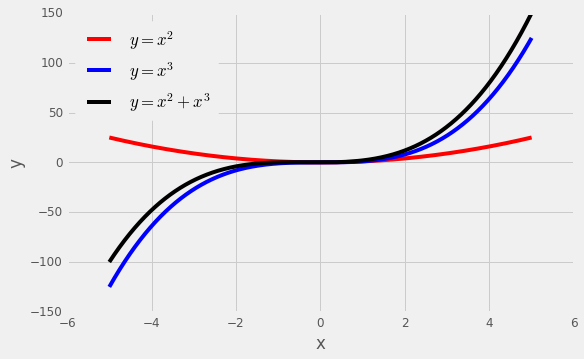

In [33]:
#probemos algún otro
plt.style.use('fivethirtyeight')
label = ['$y = x^2$', '$y = x^3$', '$y = x^2 + x^3$']
plt.plot(x, y1, 'r-', x, y2, 'b-', x, y3, 'k-')
plt.legend(label, loc='best')
plt.xlabel('x')
plt.ylabel('y')

## Yapa Matplotlib: Subfiguras
Matplotlib tiene un mecanismo para hacer subfiguras

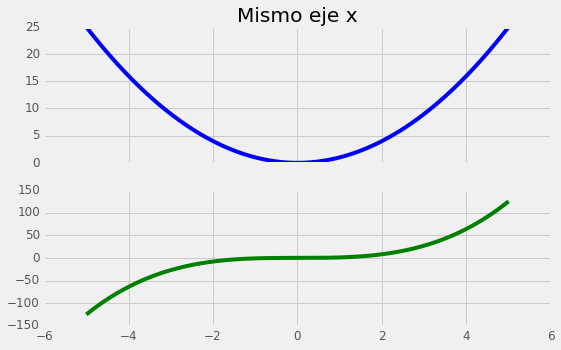

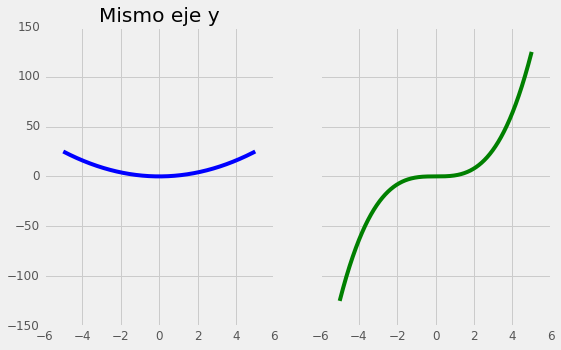

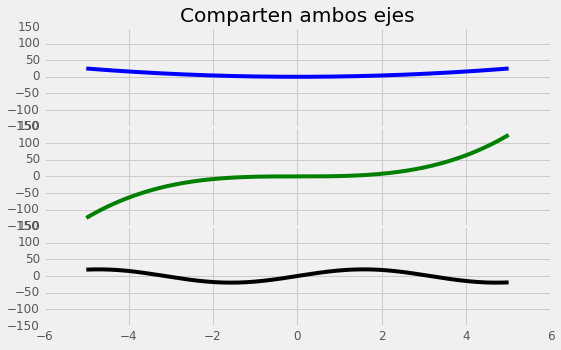

In [73]:
plt.style.reload_library()

f, (ax1, ax2) = plt.subplots(2, sharex=True) #Devuelve una tupla además de la figura!
ax1.plot(x, y1, "b-")
ax1.set_title('Mismo eje x')
ax2.plot(x, y2, "g-")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y1, "b-")
ax1.set_title('Mismo eje y')
ax2.plot(x, y2, "g-")


f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True) #Saca el sharey y fijate que pasa!
ax1.plot(x, y1, "b-")
ax1.set_title("Comparten ambos ejes")
ax2.plot(x, y2, "g-")
ax3.plot(x, 20*np.sin(x), "k-")
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

Algo también útil a veces es un gráfico dentro de otro gráfico

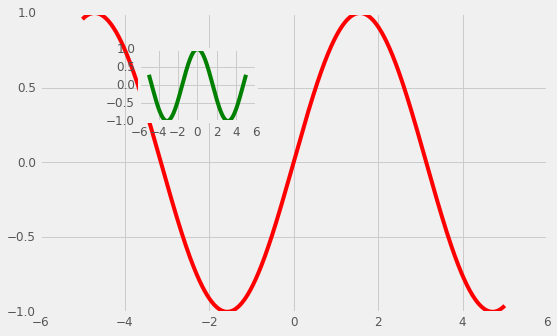

In [69]:
t = np.linspace(-5,5,1000)
Y = np.sin(t)
Y1 = np.cos(t)

fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(t,Y, 'r-')
ax2.plot(t,Y1, "g-")

plt.show()

Algo aún más interesante, es hacer un zoom a alguna parte del gráfico. Es engorroso, pero cuando le agarrás la mano queda espectacular

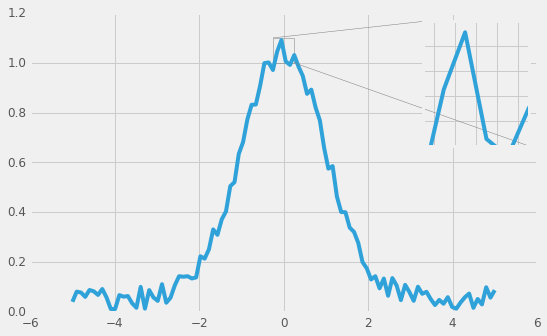

In [71]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()

# prepare the demo image
x = np.linspace(-5,5,100)
y = np.exp(-x**2/2) + 0.1*np.random.rand(100)


ax.plot(x,y)

axins = zoomed_inset_axes(ax, 5, loc=1)  # zoom = 6
axins.plot(x,y)

# sub region of the original image
x1, x2, y1, y2 = -0.25,0.25 , 1, 1.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
plt.show()

In [ ]:
#Ejercicio: a partir de x creen una y = a * x**2 + b * x + c. 
# Hagan el ajuste con ODRPACK, ¿funcionará?

## 3. Laboratorio

### Adquisición con [PyVISA](https://pyvisa.readthedocs.org/en/stable/)

Pueden ver el [notebook para adquirir con osciloscopio](https://github.com/fifabsas/talleresfifabsas/blob/master/python/instrumental/adquisicion.ipynb) en el repo de GitHub de la FIFA.

### Análisis de datos

Ustedes pueden ~~hacer~~ programar el análisis que ~~más les guste~~ puedan. Acá les vamos a mostrar dos formas de hacer un ajuste: la primera es definiendo nosotros una función que haga los cuadrados mínimos; la segunda es mediante los métodos de [scipy.odr](http://docs.scipy.org/doc/scipy/reference/odr.html#module-scipy.odr). Vamos a importar eso cuando lo necesitemos.

Antes de ponernos a ajustar, vamos a construirnos algunos datos que simulen a alguna cosa medianamente lineal que podríamos conseguir en un labo. Ya que estamos, les vamos a mostrar cómo pueden guardar e importar archivos de texto con numpy.

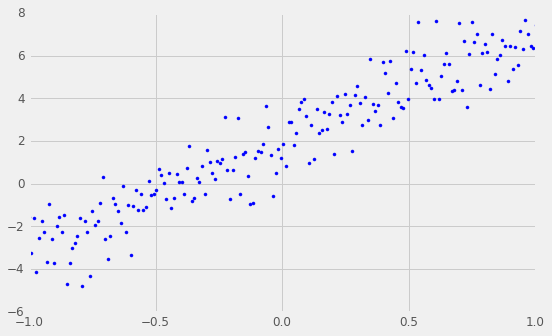

In [34]:
f = lambda B, x: B[0] * x + B[1] #una lineal
N = 200 #este va a ser el número total de datos
x = np.linspace(-1, 1, N)
ruido = np.random.randn(N) #un array de N elementos random con distribución normal alrededor del 0
data = f([5, 2], x) + ruido
plt.plot(x, data, 'b.')

<Container object of 3 artists>

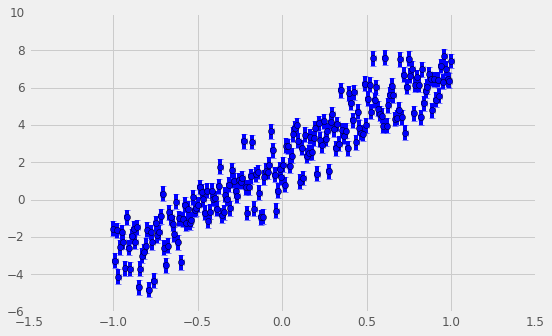

In [35]:
#y si tengo errores?
errX = np.ones_like(x) * 0.015
errY = np.ones_like(x) * .4
plt.errorbar(x, data, yerr=errY, xerr=errX, fmt='bo')

Veamos como guardar estos datos, sólo para poder mostrarles después como pueden importar datos. Para guardar, usamos np.savetxt y para importar np.loadtxt.

In [37]:
archivo = './archivo.txt' #ruta donde van a guardar el archivo
np.savetxt(archivo, np.c_[x, data, errX, errY], delimiter='\t') #np.c_[] para que se guarden como columnas

Ahora hagamos como que nunca creamos ningún dato, e importemos lo que acabamos de guardar.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

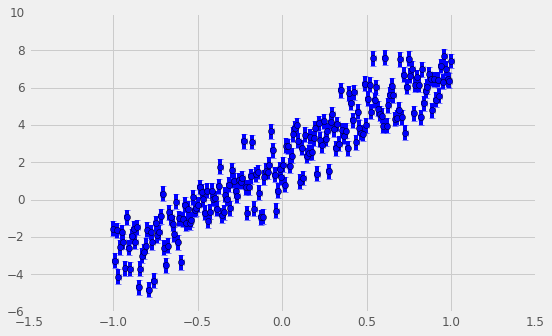

In [38]:
xdata, ydata, errx, erry = np.loadtxt(archivo, delimiter='\t', unpack=True)
#xy_data = np.loadtxt(archivo, delimiter='\t') #unpack es False por default
plt.errorbar(xdata, ydata, erry, errx, fmt='bo') #grafiquemos para ver que son lo mismo
print(x==xdata, data==ydata, errx==errX, erry==errY)#otro chequeo por si las dudas

Ahora si, hagamos un ajuste. Hagamos primero la versión manual: nos definimos una función que haga la regresión lineal. En este caso, la regresión sólo acepta errores en la variable y (ajuste común). Más adelante vemos como odr nos permite ajustar errores en ambas variables.

In [39]:
def ajustelineal(x,y,errores):
    """
    Ajusta los datos con una recta lineal en el sentido de max verosimilitud
    errores es un array con las desviaciones estándar de los valores y
    x es un array con los valores independientes (sin error)
    y es un array con los datos medidos que se desea ajustar
    ---
    Devuelve: slope,intercept,r2,chi2,pcov
    pcov es la matriz de covarianza de slope e intercept
    slope = slope +- sqrt(pcov[0,0])
    intercept = intercept +- sqrt(pcov[1,1])
    """
    import numpy as np
    # Supongo mediciones no correlacionadas --> V prop. Id.
    # El ajuste es lineal en x, pero puede ser lineal en theta
    N = len(x)
    A = np.ones((N,2))
    A[:,1] = x
    Vi = np.diag(1/errores**2)
    
    pcov = np.linalg.inv( np.dot(np.transpose(A),np.dot(Vi,A)))
    theta = np.dot(np.dot(pcov, np.transpose(A)),np.dot(Vi,y))
    slope = theta[1]
    intercept = theta[0]
    
    # Coeficiente R2
    fit = theta[0]+theta[1]*x
    r2 = 1 - sum((y-fit)**2)/sum((y-np.mean(y))**2)
    # Coeficiente Chi2
    chi2 = np.dot(np.transpose(y-fit),np.dot(Vi,y-fit))/(N-2)
    return slope,intercept,r2,chi2,pcov


In [41]:
#nos devuelve una tupla con la pendiente, la ordenada, el r^2, el chi^2 y lamatriz de covarianza
a, b, r2, chi2, cov = ajustelineal(xdata, ydata, erry)
print('Pendiente:', a, '\nOrdenada:', b, '\nr²:', r2, '\nCovarianza:', cov)

Pendiente: 5.12405177922 
Ordenada: 1.97972556996 
r²: 0.891676082044 
Covarianza: [[  8.00000000e-04  -4.38966939e-20]
 [ -4.38966939e-20   2.37611940e-03]]


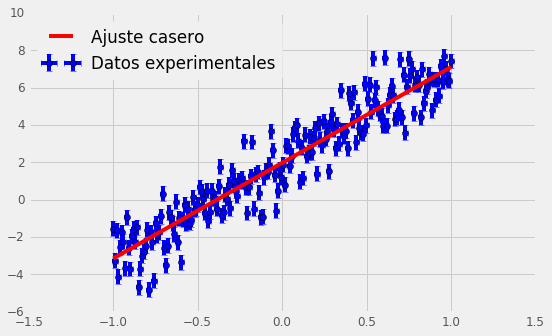

In [42]:
plt.errorbar(xdata, ydata, erry, errx, fmt='bo')
plt.plot(xdata, f([a, b], xdata), 'r-')
plt.legend(['Ajuste casero', 'Datos experimentales'], loc='best')

## ERA TAN FACIL DEJAR DE USAR EL ORIYIN!!!!

Ahora si, terminemos con esto viendo como ajustar con las funciones de odr. scipy.odr es una interfaz para ODRPACK, una librería de Fortran-77 para hacer regresiones ortogonales (tranquilos, no hace falta aprender Fortran (pero háganlo si quieren!)). Si quieren investigar un poco, tienen la guía de [ODRPACK](http://docs.scipy.org/doc/external/odrpack_guide.pdf). Importemos:

In [45]:
import scipy as sp
from scipy import odr

In [46]:
#usamos pesos o covarianzas
out = sp.odr.odr(f, [1., 2.], ydata, xdata, wd = 1/errx**2, we = 1/erry**2)
out

(array([ 5.14630956,  1.97972556]),
 array([ 0.12694248,  0.07365193]),
 array([[  2.46499801e-03,   2.70110610e-11],
        [  2.70110610e-11,   8.29795130e-04]]))

Con un poquito más de control, y paso a paso.

In [47]:
#definimos el modelo a usar
linear = odr.Model(f)
#luego los datos (ver también odr.RealData)
data = odr.Data(xdata, ydata, wd = 1/errx**2, we = 1/erry**2)
#instanciamos la clase ODR y calculamos con el método run()
myodr = odr.ODR(data, linear, beta0=[1., 2.])
out2 = myodr.run()
#podemos pprintear
out2.pprint()
out2.beta

Beta: [ 5.14630956  1.97972556]
Beta Std Error: [ 0.12694248  0.07365193]
Beta Covariance: [[  2.46499801e-03   2.70110610e-11]
 [  2.70110610e-11   8.29795130e-04]]
Residual Variance: 6.537284687146706
Inverse Condition #: 0.685926241736269
Reason(s) for Halting:
  Sum of squares convergence


array([ 5.14630956,  1.97972556])

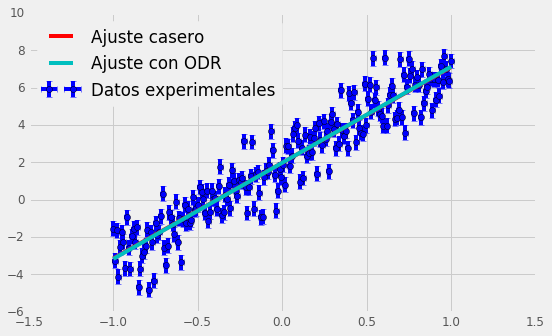

In [48]:
#plotiemos todo
plt.errorbar(xdata, ydata, erry, errx, fmt='bo')
plt.plot(xdata, f([a, b], xdata), 'r-')
plt.plot(xdata, f(out2.beta, xdata), 'c-')
leyendas = ['Ajuste casero', 'Ajuste con ODR', 'Datos experimentales']
plt.legend(leyendas, loc='best')

## 4. Yapas!

### Integración numérica de ecuaciones diferenciales

.En Python podemos obtener soluciones numéricas a sistemas de ecuaciones de primer orden usando la función [_odeint_](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.odeint.html) de SciPy. No vamos a preocuparnos por el algoritmo que usa para resolver, ese no es el objetivo del taller, pero si quieren investigar la función es una interfaz al integrador _lsoda_ de la biblioteca _ODEPACK_ de FORTRAN.

Para aquellos de ustedes que no hayan cursado Mate 3, o que la hayan aprobado por puta intuición, cabe recordar que, en general, cualquier ecuación diferencial de orden mayor a 1 la puedo reescribir como un sistema de ecuaciones TODAS de primer orden. Es decir, odeint no es para nada limitado.

Como ejemplos, vamos a mostrar soluciones para el oscilador de Van der Pol y el atractor de Rössler. El segundo nos va a permitir incluir otra yapa.

Las ecuaciones para el Van der Pol son estas:

$$
\begin{cases}
    \dot{x} = y \\
    \dot{y} = \mu * (1-x^2) * y - x
\end{cases}
$$

In [49]:
from scipy.integrate import odeint

In [50]:
#arrancamos con el de Van der Pol
def van_der_pol(x, t, mu):
    X, Xdot = x
    return [Xdot, mu * (1 - X**2) * Xdot - X]

X0 = [0, 1] #condiciones iniciales
t = np.linspace(0, 100, 10000) #tiempo
mu = 5 #parámetro
p = (mu,) #a odeint le gusta que le pases los parámetros dentro de una tupla

sol = odeint(van_der_pol, X0, t, args=p)

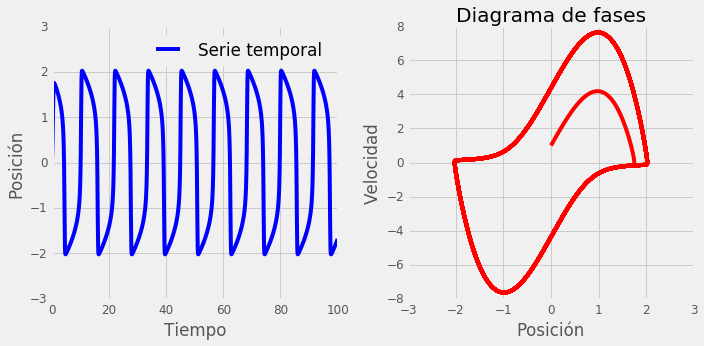

In [51]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #figura con dos ejes, 1 fila y dos columnas
ax[0].plot(t, sol[:,0], 'b-', label=('Serie temporal')) #se grafica sobre los ejes
ax[1].plot(sol[:,0], sol[:,1], 'r-') 
ax[0].legend(loc='best') #la leyenda sobre cada eje
ax[1].set_title('Diagrama de fases') #lo mismo los títulos
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Posición')
ax[1].set_xlabel('Posición')
ax[1].set_ylabel('Velocidad')
fig.tight_layout() #alineación correcta

Ahora hagamos lo mismo pero con el atractor de Rössler. Las ecuaciones son estas:

$$ 
\begin{cases}
    \dot{x} = -y -z \\
    \dot{y} = x + a * y \\
    \dot{z} = b + z * (x - c),
\end{cases}
$$

donde a, b, y c son parámetros. Empecemos por definir una función que nos dado un [x, y, z], nos calcule las derivadas. Igual que como hicimos con el Van der Pol. 

In [52]:
def rossler(X, t, a=0.2, b=0.2, c=5.7):
    x, y, z = X[0], X[1], X[2]
    xdot = - y- z
    ydot= x + a * y
    zdot = b + z * (x - c)
    return [xdot, ydot, zdot]

X0 = [0, 1, 1] #condiciones iniciales
tR = np.linspace(0, 100, 10000) #tiempo
solR = odeint(rossler, X0, tR)

Ahora si, veamos cómo podemos hacer un gráfico tridimensional con matplotlib. Como esto no es lo default para matplotlib, ni para lo que fue diseñado, los gráficos no van a tener la misma calidad que los 2D. Para gráficos 3D geniales, les recomendamos que miren un poco el paquete [Mayavi](http://docs.enthought.com/mayavi/mayavi/).

Volvamos a lo que nos compete: tenemos que importar Axes3D.

In [53]:
#en versiones viejas de matplotlib, es Axes3D
from mpl_toolkits.mplot3d import axes3d

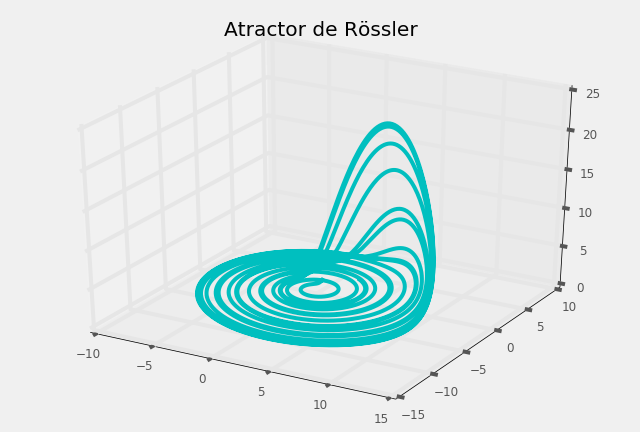

In [54]:
fig3D = plt.figure(figsize=(10, 7))
ax3D = fig3D.gca(projection='3d')
ax3D.plot(solR[:, 0], solR[:, 1], solR[:, 2], 'c-')
ax3D.set_title('Atractor de Rössler')

### Estadística básica
Scipy tiene un apartado de stats, que vamos a usar para hacer operaciones simples, después cada uno puede investigar otras cosas (como los test de hipótesis)

In [55]:
from scipy import stats

In [56]:
N = sp.stats.norm(loc=0,scale=1)

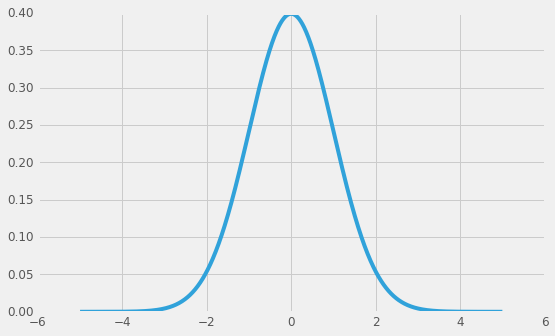

In [57]:
t = np.linspace(-5,5,1000)
plt.plot(t, N.pdf(t))

Ahora una herramienta muy útil para obtener información descriptiva

DescribeResult(nobs=100, minmax=(0.0014175420884549224, 0.98562815371551993), mean=0.46502966047841665, variance=0.078555732605007159, skewness=0.13180816000474596, kurtosis=-1.0418141597528623)


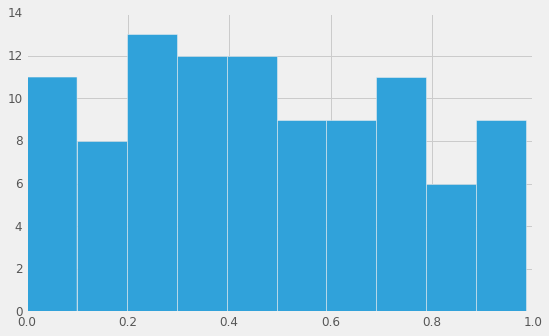

In [58]:
t = np.random.beta(1,1,100) #Busquen lo que es la función beta, y cambien los parámetros
print(sp.stats.describe(t))
plt.hist(t);

Veamos algo interesante del caso de ajuste lineal

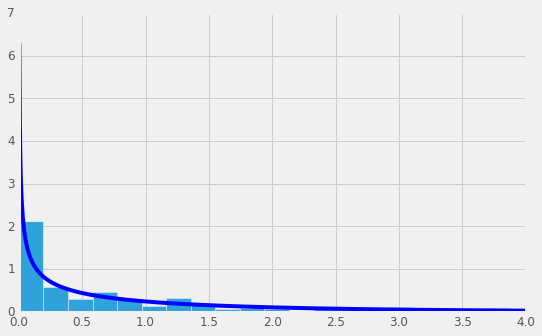

In [66]:
residuos = (f([a, b], xdata) - ydata)**2
p = plt.hist(residuos[residuos < 4], bins=20, normed=True);
t = np.linspace(0, 4, 1000)
plt.plot(t, sp.stats.chi2(df=1).pdf(t),'b-')

Si tuviesemos más datos, la χ-cuadrado de un grado de libertad se acercaría más a los datos. Esto se puede demostrar, pero queda para un curso de estadística